In [1]:
#Libraries - all required except plt (just for checking and visualization) and mp (for viewing final model)
import matplotlib.pyplot as plt
import numpy as np
import triangle as tr
import meshio
import meshplot as mp
import json
import subprocess
import os

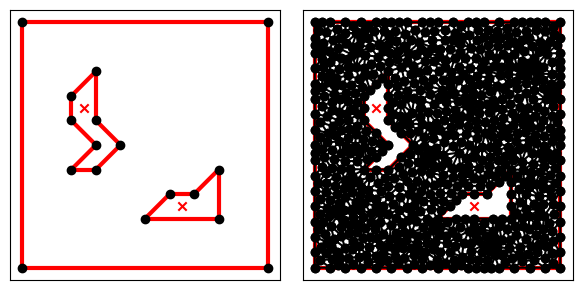

In [2]:
#Forming the object (manually)
pts0 = np.array(((0, 0), (10, 0), (10, 10), (0, 10))) #border
pts1 = np.array(((2, 4), (3, 4), (4, 5), (3, 6), (3,8), (2, 7), (2, 6), (3, 5))) #top-left tear 
pts2 = np.array(((5, 2), (8, 2), (8, 4), (7, 3), (6, 3))) #bottom-right tear

pts = np.vstack([pts0, pts1, pts2]) #combined

#connecting points together (manually)
seg0 = np.array(((0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 4), (12, 13), (13, 14), (14, 15), (15, 16), (16, 12)))

#indicies where segment meets up with beginning of shape--needed for random colour generation, but not manual
loop_backs = [3, 11, 16]

#form mesh
A = dict(vertices=pts, segments=seg0, holes=[[2.5,6.5], [6.5, 2.5]])
meshObj = tr.triangulate(A, 'qpa0.1')
tr.compare(plt, A, meshObj)

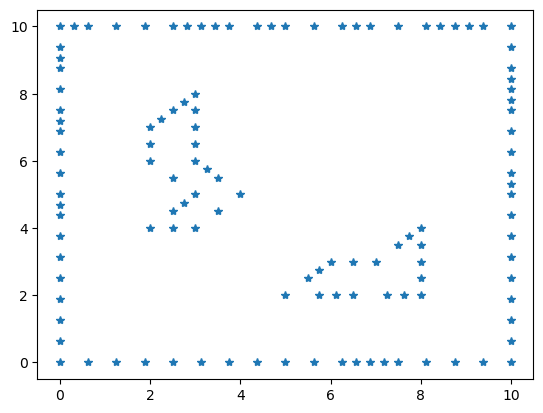

In [3]:
#Plot ONLY points that are on a segment line
vm = meshObj["vertex_markers"]
v = meshObj['vertices']

vm, _ = np.where(vm == 1)

plt.plot(v[vm, 0], v[vm, 1], "*")

In [4]:
#Helper function for solve() - determines if an int is between two other ints
def is_between(num, n1, n2):
    if (num <= n1 and num >= n2) or (num >= n1 and num <= n2):
        return True
    else:
        return False

    
#function that determines if a point is between two other points on the same line
def solve(coordinates) -> bool:
    (x0, y0), (x2, y2) = coordinates[0], coordinates[2]
    x1, y1 = coordinates[1]
    if ((x0 - x2) * (y2 - y1) == (x2 - x1) * (y0 - y2)) and (is_between(x1, x0, x2) and is_between(y1, y0, y2)):
        return True
    else:
        return False


all_dots = v[vm] #points on segment lines
green_dots = all_dots[len(seg0):] #points generated by triangle on lines
red_dots = all_dots[:len(seg0)] #points manually plotted


#create list of segments 
segment_lines = []
for line in seg0:
    segment_lines.append([v[line[0]], v[line[1]]])


#Create dictionary where:
#key = corresponding segment index in segment_lines, value = list of triangle-generated points on that line
segment_green_points = {}

for line_index in range(len(segment_lines)):
    for p_i in range(len(green_dots)):
        if solve([segment_lines[line_index][0], (green_dots[p_i][0], green_dots[p_i][1]), segment_lines[line_index][1]]):
            if line_index in segment_green_points:
                segment_green_points[line_index].append((green_dots[p_i][0], green_dots[p_i][1], p_i + len(red_dots)))
            else:
                segment_green_points[line_index] = [(green_dots[p_i][0], green_dots[p_i][1], p_i + len(red_dots))]


rgb_segs = []
                
#Generate RANDOM rgb values for manually plotted points
def random_colours():
    random_colour1 = np.random.randint(2), np.random.randint(2), np.random.randint(2)
    random_colour2 = np.random.randint(2), np.random.randint(2), np.random.randint(2)
    segm = [(segment_lines[0][0][0], segment_lines[0][0][1]), (segment_lines[0][1][0], segment_lines[0][1][1])]
    rgb_segs.append({"segment": segm, "colours": [random_colour1, random_colour2]})

    for segment_index in range(1, len(segment_lines)):
        random_colour = np.random.randint(2), np.random.randint(2), np.random.randint(2)
        segm = [(segment_lines[segment_index][0][0], segment_lines[segment_index][0][1]), (segment_lines[segment_index][1][0], segment_lines[segment_index][1][1])]
        rgb_segs.append({"segment": segm, "colours": [rgb_segs[segment_index - 1]["colours"][1], random_colour]})

    rgb_segs[loop_backs[0]]['colours'][1] = rgb_segs[0]['colours'][0]
    for loop_num_i in range(1, len(loop_backs)):
        rgb_segs[loop_backs[loop_num_i]]['colours'][1] = rgb_segs[loop_backs[loop_num_i - 1]+1]['colours'][0]


#Generate MANUALLY PLOTTED rgb values for manually plotted points
def fixed_colours():
    colour1 = 1.0, 0.0, 1.0
    colour2 = 1.0, 1.0, 0.0
    colour3 = 0.0, 1.0, 0.0
    colour4 = 1.0, 1.0, 0.0
    colour5 = 1.0, 0.0, 1.0
    colour6 = 0.0, 1.0, 0.0
    colour7 = 1.0, 1.0, 0.0
    colour8 = 0.0, 1.0, 0.0
    colour9 = 1.0, 0.0, 0.0
    colour10 = 1.0, 0.0, 0.0
    colour11 = 0.0, 1.0, 0.0
    colour12 = 1.0, 1.0, 1.0
    colour13 = 1.0, 1.0, 0.0
    colour14 = 1.0, 0.0, 0.0
    colour15 = 0.0, 0.0, 0.0
    colour16 = 0.0, 1.0, 1.0
    colour17 = 1.0, 1.0, 1.0

    cols = [colour2, colour3, colour4, colour5, colour6, colour7, colour8, colour9, colour10, colour11, colour12, colour13, colour14, colour15, colour16, colour17, colour13]
    segm = [(segment_lines[0][0][0], segment_lines[0][0][1]), (segment_lines[0][1][0], segment_lines[0][1][1])]
    rgb_segs.append({"segment": segm, "colours": [colour1, colour2]})

    for i in range(1, len(segment_lines)):
        segm = [(segment_lines[i][0][0], segment_lines[i][0][1]), (segment_lines[i][1][0], segment_lines[i][1][1])]
        rgb_segs.append({"segment": segm, "colours": [cols[i-1], cols[i]]})

fixed_colours() #can change to random_colours() if preferred


#copy rgb_segs to rgb_points, but one point per index instead of one segment (helpful for interpolation later)
rgb_points = []

for i in range(len(all_dots)):
    rgb_points.append(None)

for point_index in range(len(red_dots)):
    col = rgb_segs[point_index]['colours'][0]
    rgb_points[point_index] = {"point": (red_dots[point_index][0], red_dots[point_index][1]), "colour": col}


#Interpolate RGB values for all triangle-generated points
for seg in segment_green_points:
    for point in segment_green_points[seg]:
        line = segment_lines[seg]
        line_height = abs(line[0][1] - line[1][1])
        line_width = abs(line[0][0] - line[1][0])
        rel_height = abs(point[1] - line[0][1])
        rel_width = abs(point[0] - line[0][0])
        ratio = max(rel_height, rel_width) / max(line_height, line_width)
        
        start_r, start_g, start_b = rgb_segs[seg]["colours"][0]
        end_r, end_g, end_b = rgb_segs[seg]["colours"][1]
        
        r = ((end_r - start_r) * ratio) + start_r
        g = ((end_g - start_g) * ratio) + start_g
        b = ((end_b - start_b) * ratio) + start_b
        
        pnt_obj = {"point": (point[0], point[1]), "colour": (r, g, b)}
        rgb_points[point[2]] = pnt_obj

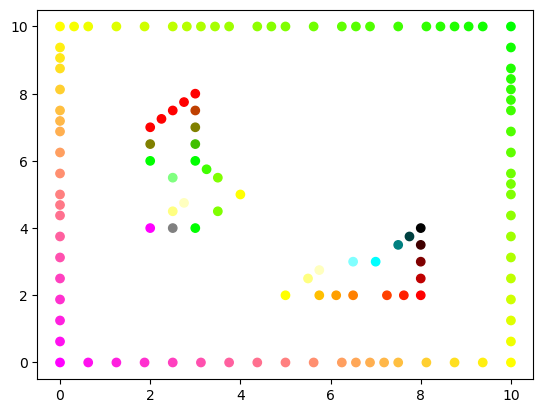

In [5]:
#plot segment lines using data gathered!
plot_x = []
plot_y = []
co = []
for i in rgb_points:
    plot_x.append(i['point'][0])
    plot_y.append(i['point'][1])
    co.append([i['colour'][0], i['colour'][1], i['colour'][2]])

plt.scatter(plot_x, plot_y, c=co)

In [6]:
#Write vertex-colour data onto txt files
vertex_reds = open("vertex_reds.txt", "w")
for point_i in range(len(rgb_points)):
    vertex_reds.write(f"{vm[point_i]} {rgb_points[point_i]['colour'][0]}\n")
vertex_reds.close()

vertex_greens = open("vertex_greens.txt", "w")
for point_i in range(len(rgb_points)):
    vertex_greens.write(f"{vm[point_i]} {rgb_points[point_i]['colour'][1]}\n")
vertex_greens.close()

vertex_blues = open("vertex_blues.txt", "w")
for point_i in range(len(rgb_points)):
    vertex_blues.write(f"{vm[point_i]} {rgb_points[point_i]['colour'][2]}\n")
vertex_blues.close()


#Write mesh generated by triangle onto obj file
obj = open("meshObj.obj", "w")
for point in meshObj['vertices']:
    obj.write(f'v {point[0]} {point[1]}  0\n')
obj.write('\n\n\n\n\n\n')
for triangle in meshObj['triangles']:
    obj.write(f'f {triangle[0] + 1} {triangle[1] + 1} {triangle[2] + 1}\n')
obj.close()

#Set up problems for PolyFEM
reds = {
    "geometry": {
        "mesh": "meshObj.obj"
    },
    "materials": {
        "type": "Laplacian"
    },
    "boundary_conditions": {
        "dirichlet_boundary": [
            "vertex_reds.txt"
        ]
    },
    "output": {
        "paraview": {
            "file_name": "red.vtu"
        }
    }
}

greens = {
    "geometry": {
        "mesh": "meshObj.obj"
    },
    "materials": {
        "type": "Laplacian"
    },
    "boundary_conditions": {
        "dirichlet_boundary": [
            "vertex_greens.txt"
        ]
    },
    "output": {
        "paraview": {
            "file_name": "green.vtu"
        }
    }
}

blues = {
    "geometry": {
        "mesh": "meshObj.obj"
    },
    "materials": {
        "type": "Laplacian"
    },
    "boundary_conditions": {
        "dirichlet_boundary": [
            "vertex_blues.txt"
        ]
    },
    "output": {
        "paraview": {
            "file_name": "blue.vtu"
        }
    }
}


#Dump problems into readable json files
with open("red.json", "w") as fp:
    json.dump(reds, fp)
    
with open("green.json", "w") as fp:
    json.dump(greens, fp)
    
with open("blue.json", "w") as fp:
    json.dump(blues, fp)

In [7]:
#Generate red map for object
command = ["C:\\polyfem\\out\\build\\x64-Debug\\PolyFEM_bin.exe","-j", "red.json"]
p = subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

#Generate green map for object
command = ["C:\\polyfem\\out\\build\\x64-Debug\\PolyFEM_bin.exe","-j", "green.json"]
p = subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

#Generate blue map for object
command = ["C:\\polyfem\\out\\build\\x64-Debug\\PolyFEM_bin.exe","-j", "blue.json"]
p = subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

In [8]:
#Read files generated by PolyFEM
red = meshio.read("red.vtu")
green = meshio.read("green.vtu")
blue = meshio.read("blue.vtu")


#Use reordered faces from one of the files generated by PolyFEM (they're all ordered the same)
face_list = red.cells_dict['triangle']


#Grab generated RGB values and compile into a colour array (co), then convert to mp-readable array with numpy
co = []
for i in range(len(red.points)):
    co.append([red.point_data['solution'][i][0], green.point_data['solution'][i][0], blue.point_data['solution'][i][0]])
col = np.array(co)

In [14]:
#Generate 3D object!
mp.plot(red.points, face_list, c=col, return_plot=True)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(5.0, 5.0,…